In [1]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import measure

In [2]:
def generate_small_blobs(length = 64, blob_size_fraction = 0.1,
                   n_dim = 2,
                   volume_fraction = 0.2, seed = None):
  rs = np.random.default_rng(seed)
  shape = tuple([length] * n_dim)
  mask = np.zeros(shape)
  n_pts = max(int(1. / blob_size_fraction) ** n_dim, 1)
  points = (length * rs.random((n_dim, n_pts))).astype(int)
  mask[tuple(indices for indices in points[:,:])] = 1

  mask = gaussian(mask, sigma=0.25 * length * blob_size_fraction,
                  preserve_range=False)

  threshold = np.percentile(mask, 100 * (1 - volume_fraction))
  return np.logical_not(mask < threshold)

In [3]:
def generate_big_blob(img_size = 64, avg_size = 10, random_size_range = 0):
  img = np.zeros((img_size, img_size))
  posx = np.random.randint(img_size)
  posy = np.random.randint(img_size)
  blob_size = np.random.randint(avg_size-random_size_range, avg_size+random_size_range+1)
  rr, cc = sk.draw.disk((posy, posx), blob_size, shape=(img_size, img_size))

  img[rr,cc] = 1
  return img


In [4]:
def generate_blob_img(big = True, length = 64, blob_size_fraction = 0.1,
                      n_dim = 2, volume_fraction = 0.3, seed = None,
                      big_blob_size = 10, big_blob_range=0):
  small_blobs = generate_small_blobs(length, blob_size_fraction, 
                                     n_dim, volume_fraction, seed) 
  if big:
    big_blob = generate_big_blob(length, big_blob_size, big_blob_range)
    return np.logical_or(small_blobs, big_blob)
  else:
    return small_blobs


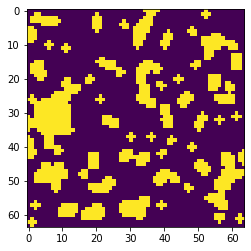

In [11]:
x = generate_blob_img(big_blob_size = 8, big_blob_range=2, blob_size_fraction = 0.08, volume_fraction = 0.25)
plt.imshow(x)